- In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

  -  Download Titanic data from Kaggle. The data in the train.csv file meets your need.
  -  Split your data into training and test sets.
  -  Predict the survival based on the test data you split by creating your model.
  -  Is your model's performance satisfactory? Explain.
  -  Try to improve your model's performance by adding or subtracting some variables. 
  

- Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re

In [2]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


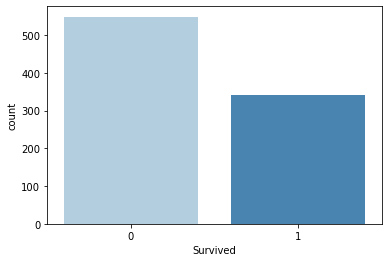

In [4]:
sns.countplot(x="Survived", data=df, palette='Blues');

In [5]:
(df.isnull().sum() *100 / df.shape[0]).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [6]:
def title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
df['Title'] = df['Name'].map(title) 

In [7]:
df['Title'] = df['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officer') 
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir','Jonkheer','Don','Dona'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [8]:
df.groupby(['Sex', 'Pclass', 'Title'])[['Age']].mean()

Age
Sex    Pclass Title             
female 1      Miss     29.744681
              Mrs      40.400000
              Officer  49.000000
              Royal    40.500000
       2      Miss     22.560606
              Mrs      33.682927
       3      Miss     16.123188
              Mrs      33.515152
male   1      Master    5.306667
              Mr       41.580460
              Officer  51.125000
              Royal    42.333333
       2      Master    2.258889
              Mr       32.768293
              Officer  42.000000
       3      Master    5.350833
              Mr       28.724891

In [9]:
df['Age'] = df.groupby(['Sex', 'Pclass', 'Title']).Age.apply(lambda x: x.fillna(x.mean()))

In [10]:
drops = ['PassengerId', 'Ticket', 'Name', 'Cabin']
df.drop(drops,axis=1,inplace=True)

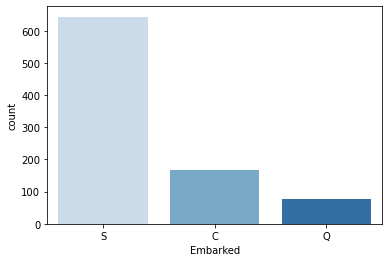

In [11]:
sns.countplot(x="Embarked", data=df, palette='Blues');

In [12]:
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [14]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex', 'Title'],
                    drop_first=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked_Q     891 non-null    uint8  
 7   Embarked_S     891 non-null    uint8  
 8   Sex_male       891 non-null    uint8  
 9   Title_Miss     891 non-null    uint8  
 10  Title_Mr       891 non-null    uint8  
 11  Title_Mrs      891 non-null    uint8  
 12  Title_Officer  891 non-null    uint8  
 13  Title_Royal    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


In [16]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0,3,22.0,1,0,7.2500,0,1,1,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,1,0,1,0,0,0


In [17]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [18]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
log = LogisticRegression(max_iter=10000)
log_model = log.fit(X_train, y_train)

In [20]:
y_pred_test = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)

In [21]:
train_accuracy = log_model.score(X_train, y_train)
test_accuracy = log_model.score(X_test, y_test)

In [22]:
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.8362760834670947
Test accuracy: 0.8208955223880597


In [23]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       392
           1       0.80      0.74      0.77       231

    accuracy                           0.84       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.83      0.84      0.83       623



In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       157
           1       0.79      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



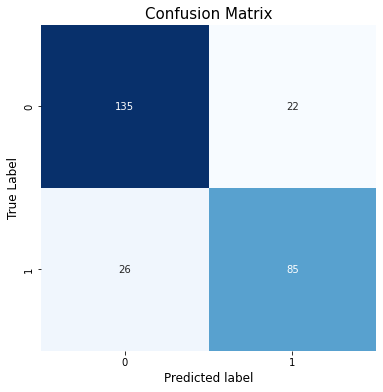

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True Label', fontsize=12);

In [26]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000,10000]
solvers = ['newton-cg','liblinear','lbfgs','sag','saga']

accuracy_values = pd.DataFrame(columns=['C_values','Solver','Train Accuracy', 'Test Accuracy'])

for solver in solvers:
    
    for c in C_values:
   
        log = LogisticRegression(max_iter=10000, C = c, random_state = 142,solver = solver)
        log_model = log.fit(X_train, y_train)
        accuracy_values = accuracy_values.append({'C_values': c,
                                                  'Solver':solver,
                                                  'Train Accuracy': log_model.score(X_train, y_train),
                                                  'Test Accuracy': log_model.score(X_test, y_test)
                                                 }, ignore_index=True)
        
display(accuracy_values.sort_values(['Train Accuracy', 'Test Accuracy'],ascending=False).reset_index(drop=True))

,C_values,Solver,Train Accuracy,Test Accuracy
0,10.000,lbfgs,0.839486,0.824627
1,10000.000,newton-cg,0.837881,0.828358
2,10.000,newton-cg,0.837881,0.824627
3,100.000,newton-cg,0.837881,0.824627
4,1000.000,newton-cg,0.837881,0.824627
5,10000.000,liblinear,0.837881,0.824627
6,100.000,lbfgs,0.837881,0.824627
7,1000.000,lbfgs,0.837881,0.824627
8,10000.000,lbfgs,0.837881,0.824627
9,10.000,liblinear,0.837881,0.820896


##### c = 10 and solver = lbfgs return the best result for train set and c = 10000 and solver = newton_cg return the best result for test set.  

In [27]:
def fare_cat(fare): #we can better observe the effect of fare by grouping
    if fare <= 7.91:
        return 'low_fare'
    elif fare <= 14.454:
        return 'low_mid_fare'
    elif fare <= 31:
        return 'mid_fare'
    elif fare <= 60:
        return  'high_low_fare'
    elif fare <= 100:
        return 'high_fare'
    else:
        return 'top_fare'

In [28]:
X_train['fare_group'] = X_train['Fare'].map(fare_cat)
X_test['fare_group'] = X_test['Fare'].map(fare_cat)

In [29]:
X_train['FamilySize'] = X_train['Parch'] + X_train['SibSp'] + 1 #we can combine all family members in one feature
X_test['FamilySize'] = X_test['Parch'] + X_test['SibSp'] + 1

In [30]:
data = [X_train, X_test]   #calculating the average fare per family member
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['FamilySize'])

In [31]:
drops_3 = ['SibSp', 'Parch']

X_train.drop(drops_3, axis=1, inplace=True)
X_test.drop(drops_3, axis=1, inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
data = [X_train, X_test]
for dataset in data:
    le = LabelEncoder()    
    dataset['fare_group'] = le.fit_transform(dataset['fare_group'])
    dataset['fare_group'] = le.fit_transform(dataset['fare_group'])

In [34]:
X_train.head()

,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal,fare_group,FamilySize,Fare_Per_Person
445,1,4.000000,81.8583,0,1,1,0,0,0,0,0,0,3,27.2861
650,3,28.724891,7.8958,0,1,1,0,1,0,0,0,2,1,7.8958
172,3,1.000000,11.1333,0,1,0,1,0,0,0,0,3,3,3.7111
450,2,36.000000,27.7500,0,1,1,0,1,0,0,0,4,4,6.9375
314,2,43.000000,26.2500,0,1,1,0,1,0,0,0,4,3,8.7500


In [35]:
log = LogisticRegression(max_iter=1000)
log_model_2 = log.fit(X_train, y_train)

In [36]:
y_pred_test = log_model_2.predict(X_test)
y_pred_train = log_model_2.predict(X_train)

In [37]:
train_accuracy = log_model_2.score(X_train, y_train)
test_accuracy = log_model_2.score(X_test, y_test)

In [38]:
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.8330658105939005
Test accuracy: 0.8246268656716418


In [39]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       392
           1       0.80      0.74      0.77       231

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623



In [40]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.80      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



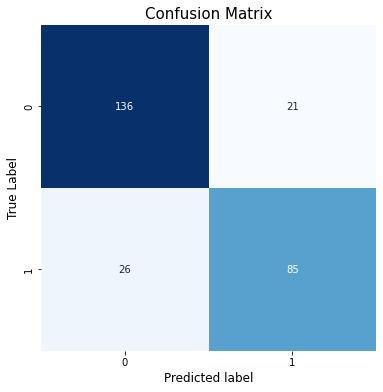

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True Label', fontsize=12);

#### The performance of the model is at satisfactory levels.There is no overfitting or underfitting and it has a high accuracy rate.